# Week 1

## 1. Import and Display Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pick the filename of the dataset to import in pandas
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

filePath = os.path.abspath(os.path.join(os.getcwd(),'Datasets', fileName))
df = pd.read_csv(filePath)

In [3]:
df

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160948,16054122161030,160541221,61030,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Monday,07/04/2016,16:08,TENDERLOIN,NONE,...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
2160949,17044968764085,170449687,64085,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Thursday,06/01/2017,18:42,BAYVIEW,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
2160950,17047243406133,170472434,6133,LARCENY/THEFT,GRAND THEFT PURSESNATCH,Friday,06/09/2017,19:10,NORTHERN,NONE,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,22.0
2160951,17095059363010,170950593,63010,WARRANTS,WARRANT ARREST,Wednesday,11/22/2017,14:30,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0


## 2. Simple Statistics
### 2.1 Report the total number of crimes in the dataset

In [4]:
nCrimesTotal = df['PdId'].count()
print('There are {} crimes recorded from 2013 to 2018 in San Francisco'
      .format(nCrimesTotal))

There are 2160953 crimes recorded from 2013 to 2018 in San Francisco


## 2.2 List the various categories of the crimes

In [5]:
df['Category'].unique()

array(['VEHICLE THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'ASSAULT', 'NON-CRIMINAL', 'BURGLARY',
       'LOITERING', 'ROBBERY', 'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING',
       'DRUG/NARCOTIC', 'TRESPASS', 'VANDALISM', 'WARRANTS',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'DRUNKENNESS',
       'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'PROSTITUTION', 'ARSON',
       'EMBEZZLEMENT', 'LIQUOR LAWS', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'SUICIDE', 'BRIBERY',
       'FAMILY OFFENSES', 'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS',
       'GAMBLING', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype=object)

## 2.3 List the number of crimes in each category

In [6]:
crimes = df.groupby(by='Category').PdId.count().sort_values(ascending=False)
crimes

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARS

## 3. Types of crime and their popularity over time

The first field we'll dig into is the column "Category".
### 3.1 List and Count all different categories of crime

In [7]:
nCrimeCategories = df['Category'].nunique()
print('There are {} different crime categories in total.'.format(nCrimeCategories))

There are 38 different crime categories in total.


<AxesSubplot:title={'center':'Occurances per different Crime Category in SF'}, xlabel='Category'>

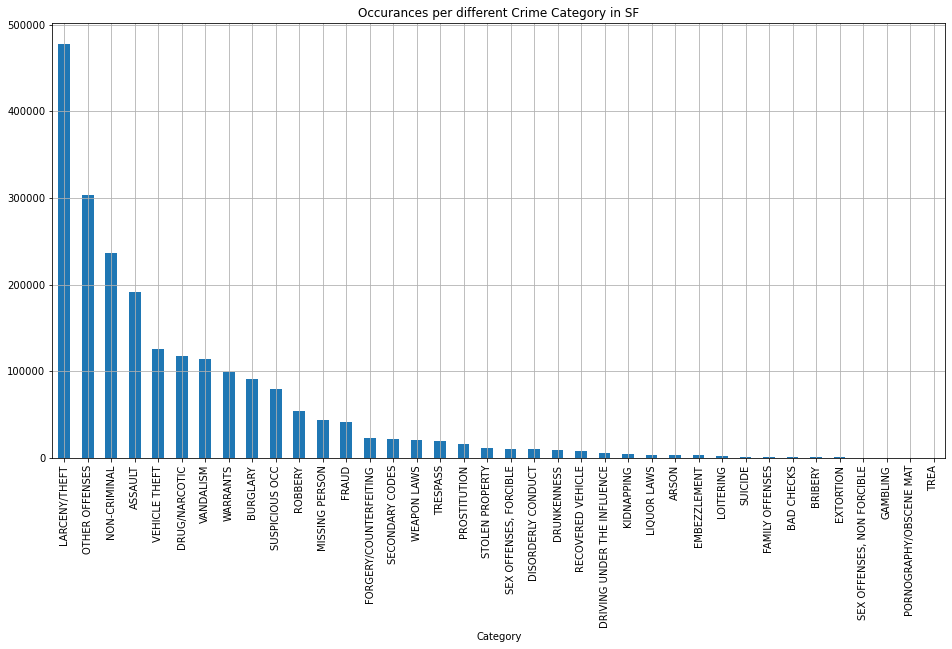

In [8]:
crimes.plot(kind='bar',figsize=(16,8), grid=True,
            title='Occurances per different Crime Category in SF')

## 3.2 Crime Statistics Chaning over time
We use the years 2003-2017 (since there is no full year data for 2018).

In [9]:
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
df2 = df[df['Year'] != '2018'].copy() # drop rows corresponding to 2018

# Calculate the Number of Crimes Per Year
nCrimesPerYear = df2.groupby('Year')['PdId'].count()
nCrimesPerYear

Year
2003    145073
2004    144323
2005    138807
2006    133726
2007    133601
2008    137113
2009    136218
2010    129750
2011    128563
2012    137334
2013    149639
2014    147056
2015    153771
2016    148379
2017    151759
Freq: A-DEC, Name: PdId, dtype: int64

In [10]:
print('The average number of crimes per year is:', round(nCrimesPerYear.mean(), 1)) 

The average number of crimes per year is: 141007.5


## 3.3 Focus Crimes: Year-by-Year development
Below is the common crimes list.

In [11]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

<AxesSubplot:xlabel='Year'>

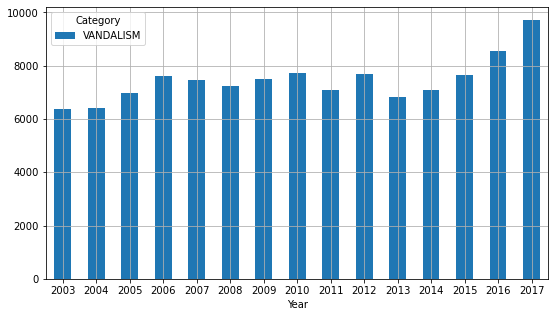

In [12]:
# Example of single plot for Vandalism
(df2.groupby(['Category', 'Year']).count()
 .filter(like = 'VANDALISM', axis=0)['PdId']
 .unstack(level=0)
 .plot(kind='bar', figsize=(9,5), rot=0, grid=True))

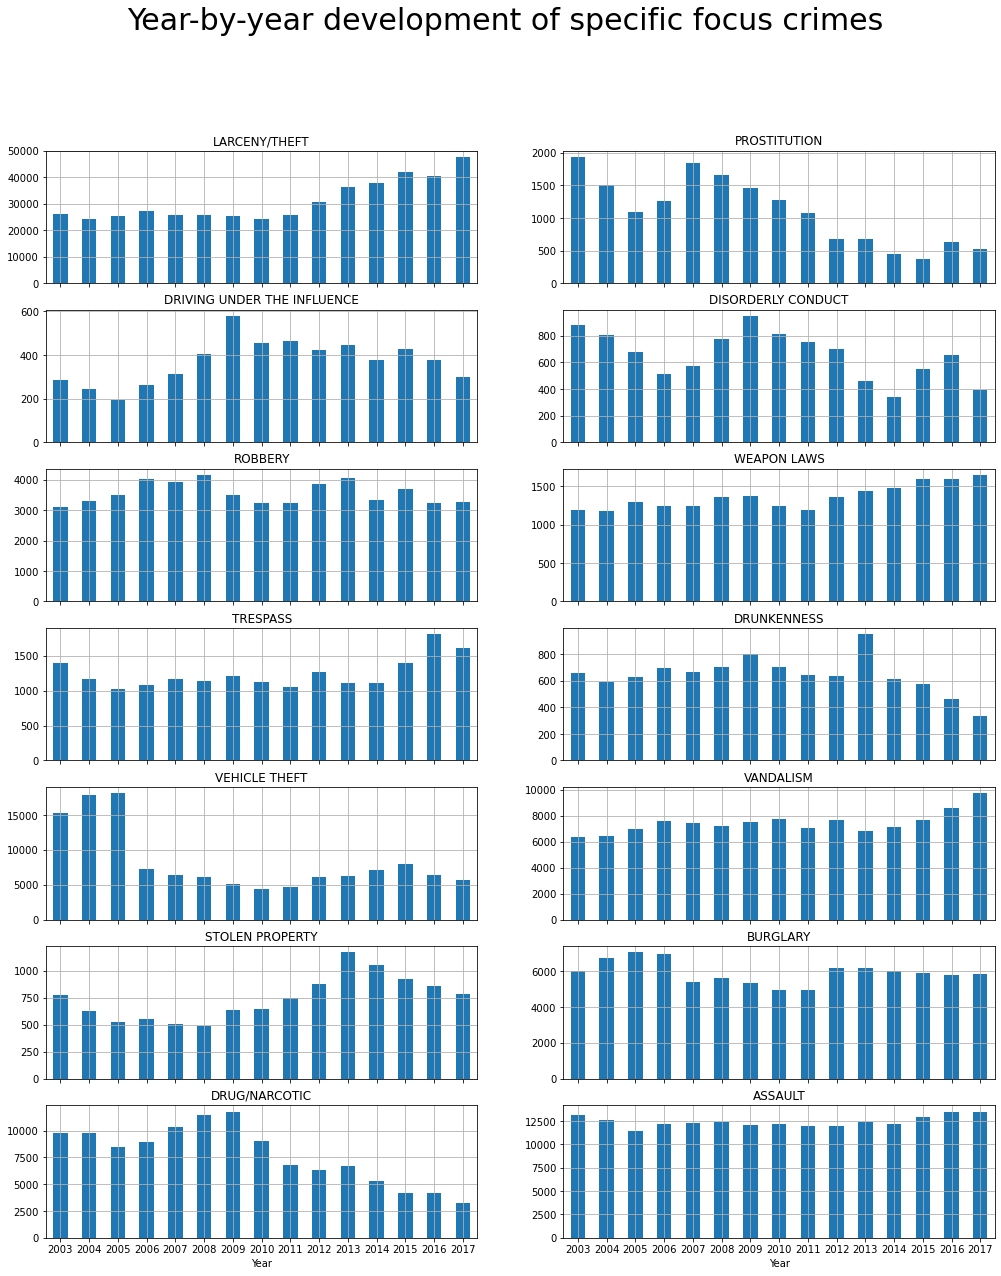

In [13]:
# Plots for year-by-year development for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 20), sharex=True)
plt.suptitle('Year-by-year development of specific focus crimes', fontsize=30)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(df2.groupby(['Category', 'Year']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0)
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    

### 3.3.1 Trends Analysis on Year-by-Year Crime Development
1. **VECHICLE THEFT**: Huge decrease in occurrences after 2005 when the engine immobilizer systam was introduced
2. **DRUG**: In the beginning of 2010 the Marijuana Control, Regulation and Education Act passed in California, removing penalties to people older than 21 years old, this can be seen in the steep decrease of recorded drug crimes from that date on. Additionally, towards the end of 2016 the sale and distribution bacame legal pushing the numbers even lower in 2017.
3. **PROSTITUTION**: Appear to have some correlation with the recorded DRUG crimes.

# Week 2
## 1. Working with the dataset (Part 2)
Below we proceed only with `df2` which includes only full years between 2003-2017.
### 1.1 Weekly Day-by-day Patterns

In [14]:
# Order the Day-of-Week column
df2['DayOfWeek'] = pd.Categorical(df2['DayOfWeek'],categories=[
                    'Monday','Tuesday','Wednesday','Thursday',
                    'Friday','Saturday','Sunday'],ordered=True)

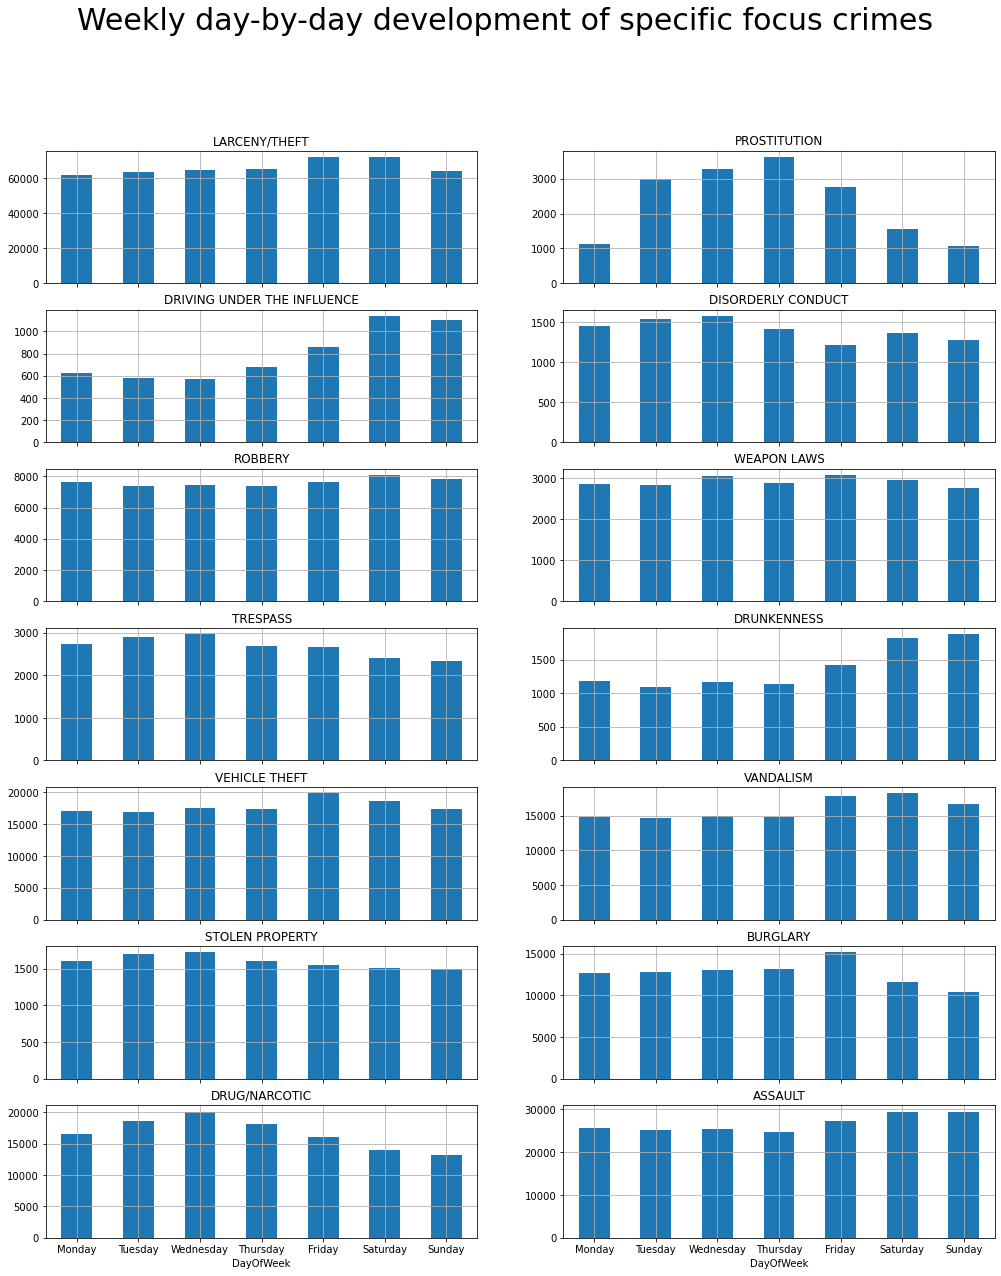

In [15]:
# Plots for day-by-day (of week) development for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 20), sharex=True)
plt.suptitle('Weekly day-by-day development of specific focus crimes', fontsize=30)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(df2.groupby(['Category', 'DayOfWeek']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0)
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)


### 1.1.1 Trends Analysis on Day-by-Day of Week Crime Development
1. **DRUNKENNESS**: ...
2. **PROSTITUTION**: ...

### 1.2 Montly Patterns

In [16]:
# Extract the Month name from Date and order the column
df2['Month'] = pd.Categorical(pd.to_datetime(df2['Date'])
                              .dt.month_name(),
                              categories=['January','February','March','April',
                                          'May','June','July','August','September',
                                          'October', 'November', 'December'],
                              ordered=True)


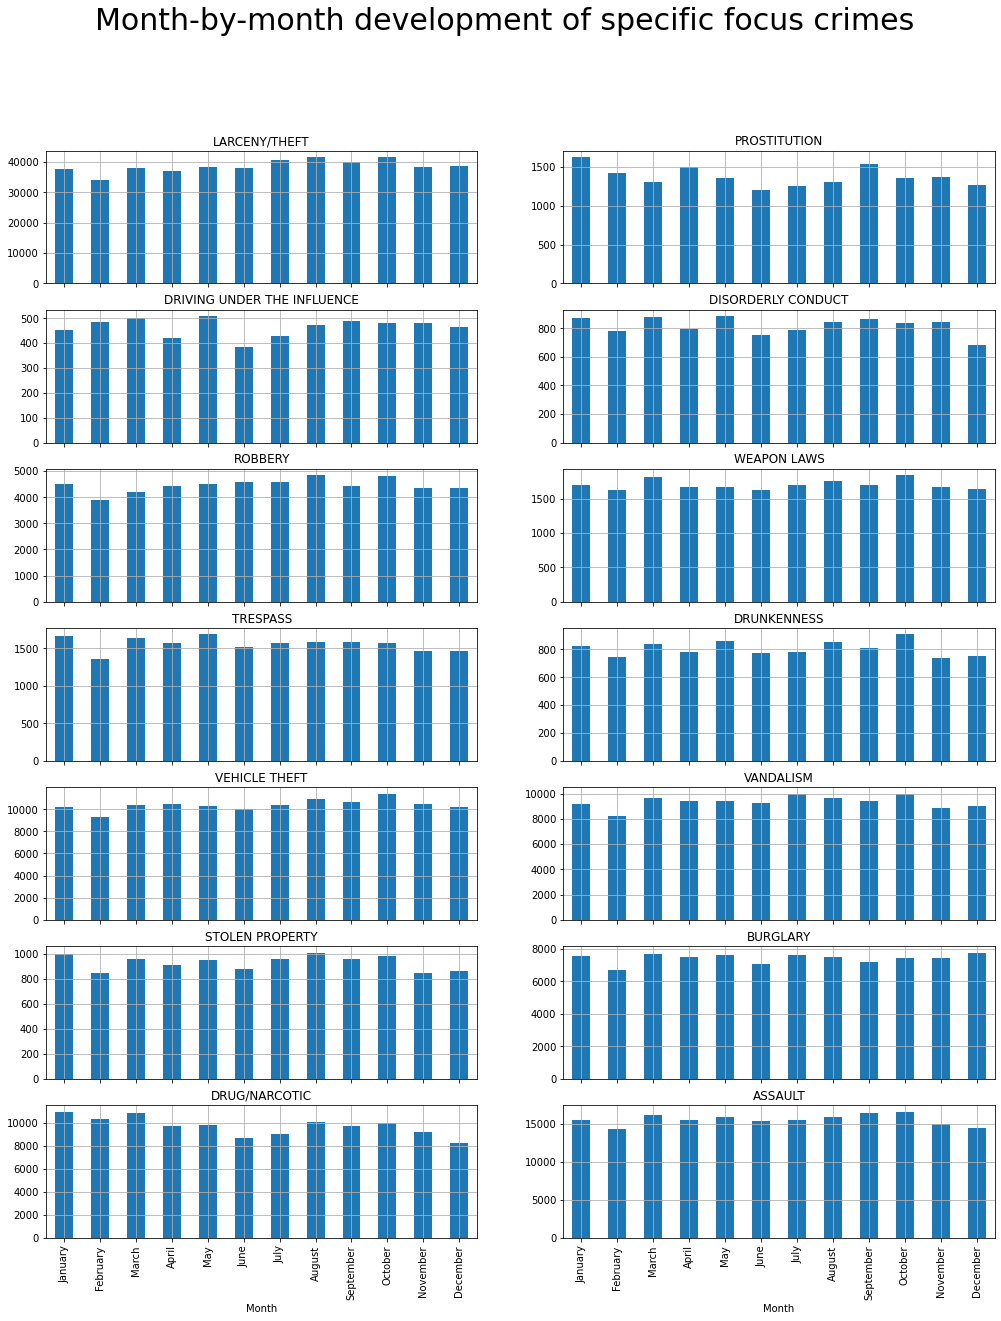

In [17]:
# Plots for month-by-month development for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 20), sharex=True)
plt.suptitle('Month-by-month development of specific focus crimes', fontsize=30)
for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(df2.groupby(['Category', 'Month']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0)
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=90, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=90, grid=True, legend=False)


### 1.2.1 Trends Analysis on Month-by-Month Crime Development
1. ...